# 模型训练调优

In [1]:
# Command for plotting in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from stocker import Stocker

查看亚马逊的股票

In [3]:
amazon = Stocker('AMZN')

AMZN Stocker Initialized. Data covers 1997-05-16 00:00:00 to 2018-03-27 00:00:00.


Maximum Adj. Close = 1598.39 on 2018-03-12 00:00:00.
Minimum Adj. Close = 1.40 on 1997-05-22 00:00:00.
Current Adj. Close = 1497.05 on 2018-03-27 00:00:00.



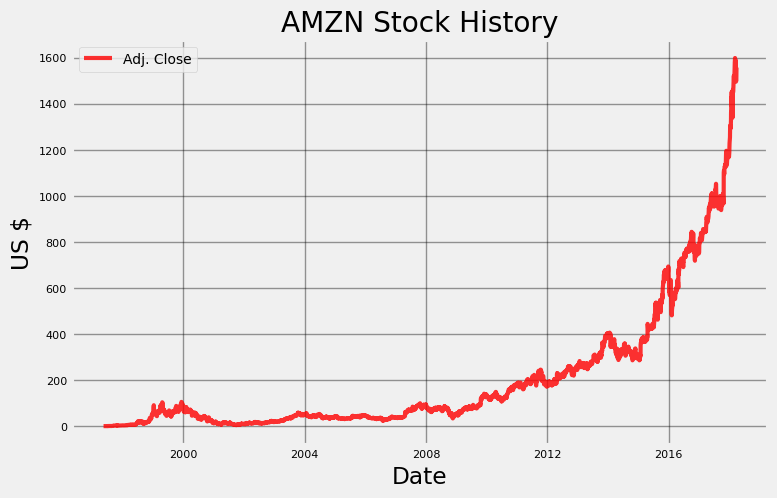

In [5]:
amazon.plot_stock()

每日变化

Maximum Daily Change = 81.38 on 2018-02-06 00:00:00.
Minimum Daily Change = -79.20 on 2018-02-08 00:00:00.
Current Daily Change = -75.35 on 2018-03-27 00:00:00.



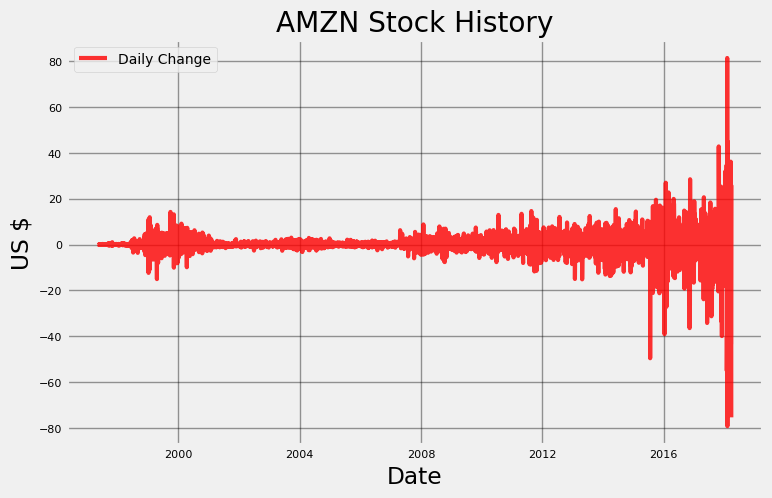

In [6]:
amazon.plot_stock(stats=['Daily Change'])

利用fbprophet将模型建立出来，然后利用模型进行预测。

e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


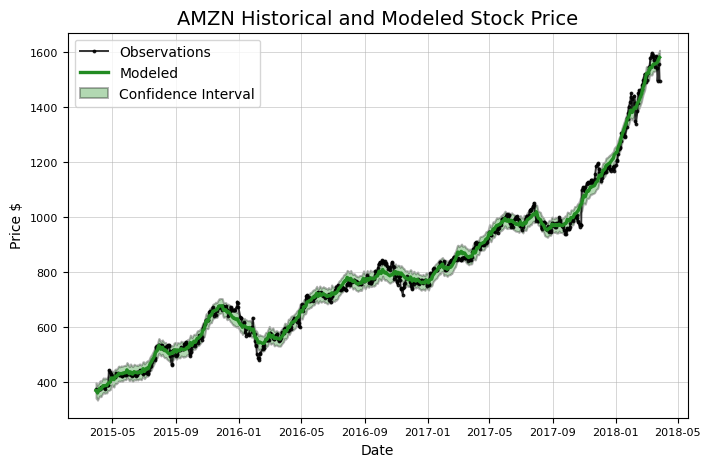

In [7]:
model, model_data = amazon.create_prophet_model()

股票详细信息

e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


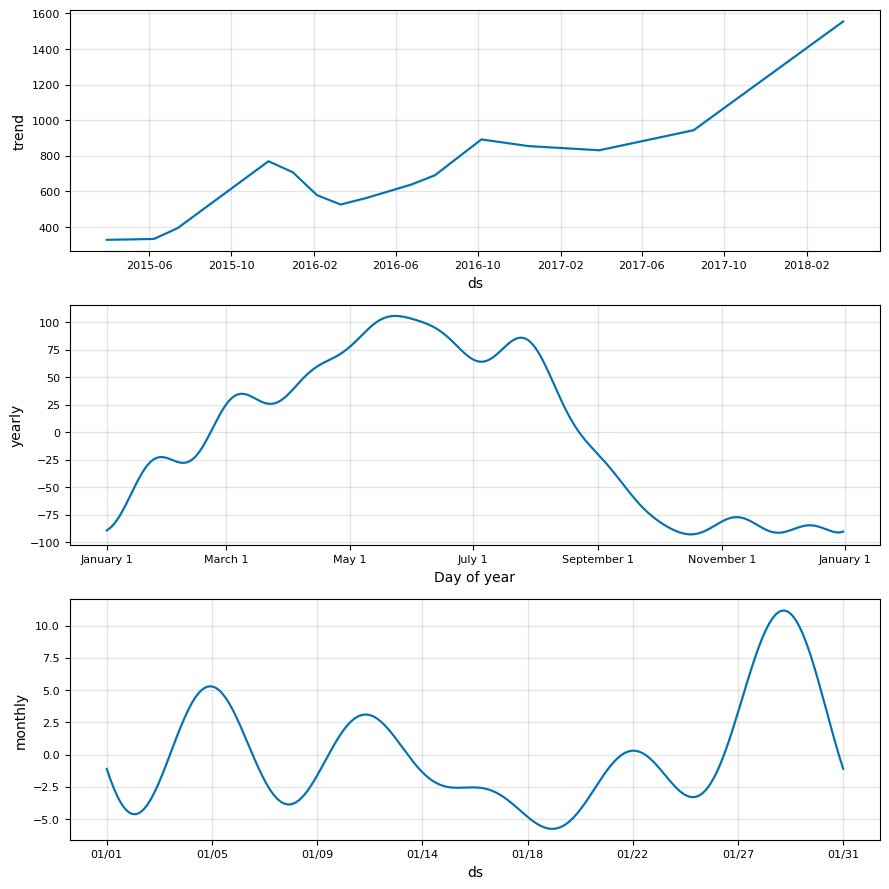

In [8]:
# Variables assigned from previous method call
model.plot_components(model_data)
plt.show()

开始预测三个月后的情况

e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Predicted Price on 2018-06-25 00:00:00 = $1878.61


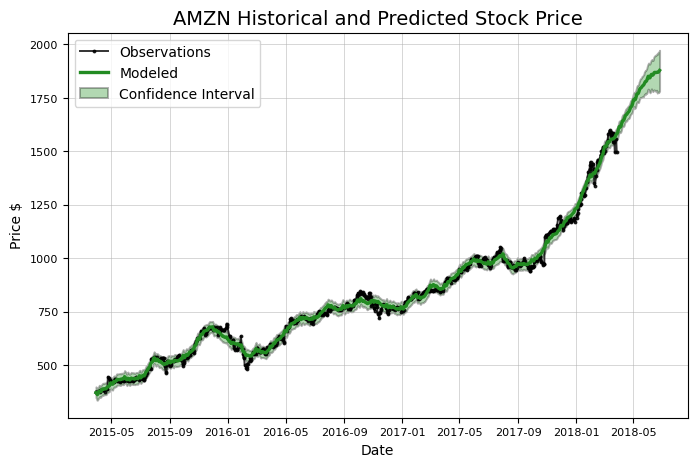

In [9]:
model, model_data = amazon.create_prophet_model(days=90)

观察发现模型太过于保守  会降低一些离散数据对结果的影响
# 模型评估
指标：预测值和真实值平均误差，上升下降趋势，置信区间

e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $1056.67.
Actual price on    2018-03-23 00:00:00 = $1495.56.

Average Absolute Error on Training Data = $16.40.
Average Absolute Error on Testing  Data = $138.50.

When the model predicted an increase, the price increased 56.33% of the time.
When the model predicted a  decrease, the price decreased  40.00% of the time.

The actual value was within the 80% confidence interval 60.24% of the time.


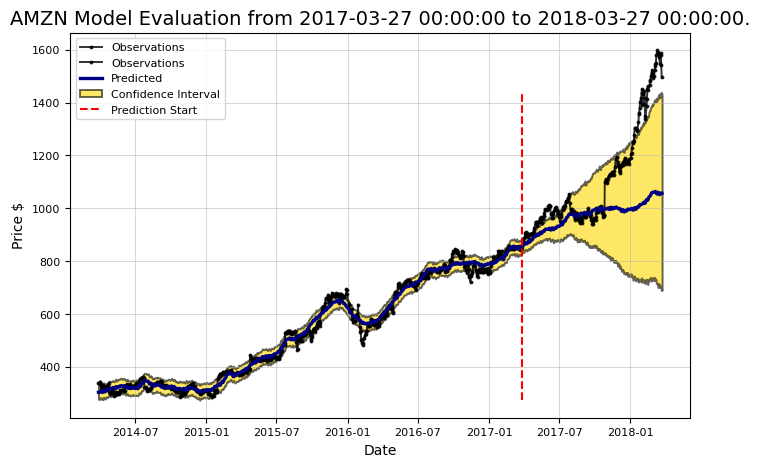

In [10]:
amazon.evaluate_prediction()

效果不好，优化
# Changepoint Prior Scale
该参数指定了突变点的权重
* 权重大了 会符合训练数据集 但过拟合也更大
* 权重小了 可能欠拟合  达不到预期要求

# 结果对模型的影响
4组参数[0.001,0.05,0.1,0.2]观察结果

e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\a

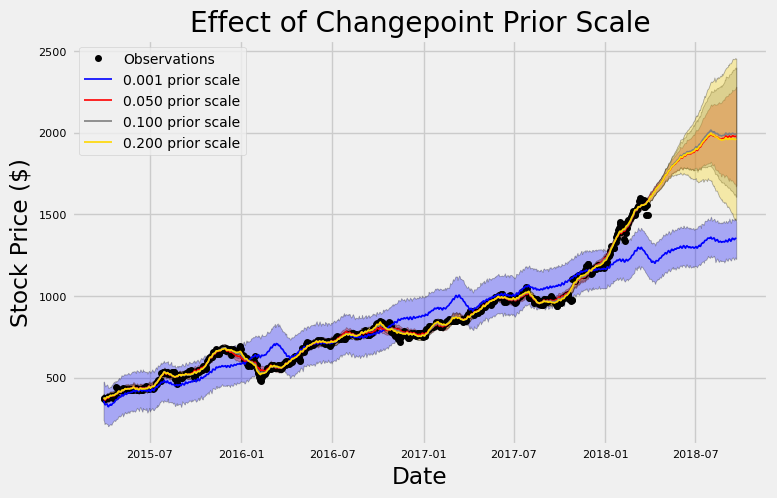

In [14]:
amazon.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

# 评估
查看模型的表现情况

## 调参过程

e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.



e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\a

     cps  train_err  train_range    test_err  test_range
0  0.001  44.476286   152.594550  149.378762  152.597846
1  0.050  11.300059    36.110075  149.821587  136.704269
2  0.100  10.697391    34.505964  149.843862  175.782239
3  0.200   9.782182    32.070970  125.474132  322.375274


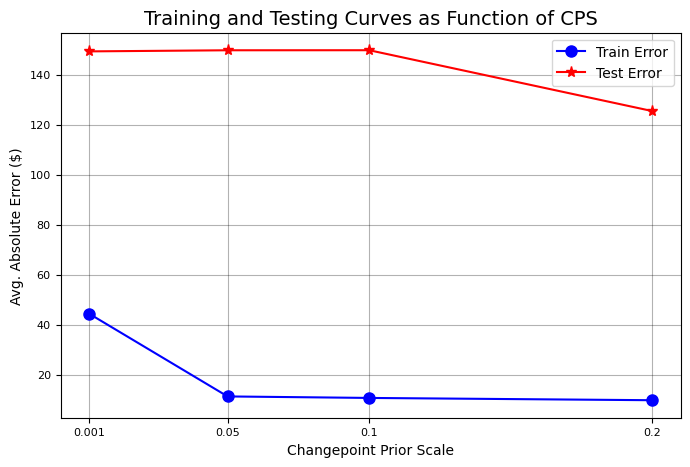

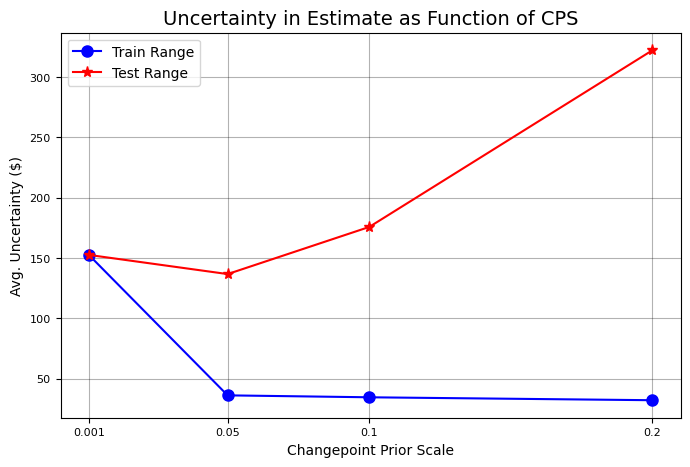

In [15]:
amazon.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])

尝试一下更大的cps值


Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.



e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\a

    cps  train_err  train_range    test_err   test_range
0  0.15  10.317571    33.498100  145.674550   214.491821
1  0.20   9.782182    32.023006  125.474132   313.550282
2  0.25   9.426322    31.112957  114.649118   395.655531
3  0.40   8.648596    29.066526   78.118800   696.400164
4  0.50   8.371109    28.276817   70.706298   878.107149
5  0.60   8.264080    28.049400   76.062744  1005.152197


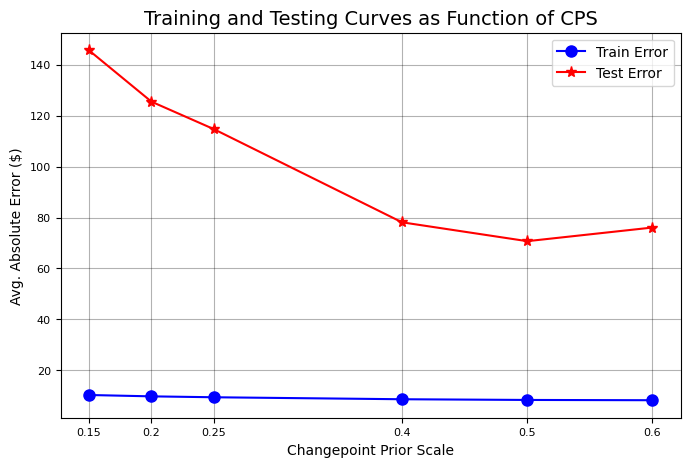

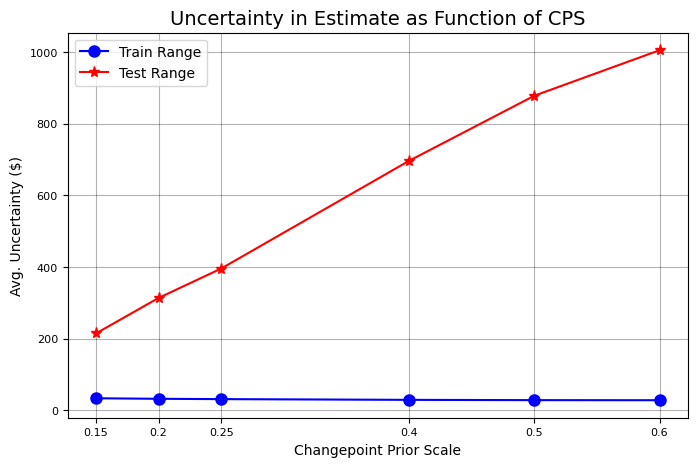

In [16]:
amazon.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.15, 0.2, 0.25,0.4, 0.5, 0.6])

调参过程得到的最佳参数

In [17]:
amazon.changepoint_prior_scale = 0.5

再次评估模型

e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $989.89.
Actual price on    2018-03-23 00:00:00 = $1495.56.

Average Absolute Error on Training Data = $10.86.
Average Absolute Error on Testing  Data = $185.20.

When the model predicted an increase, the price increased 59.46% of the time.
When the model predicted a  decrease, the price decreased  45.00% of the time.

The actual value was within the 80% confidence interval 80.32% of the time.


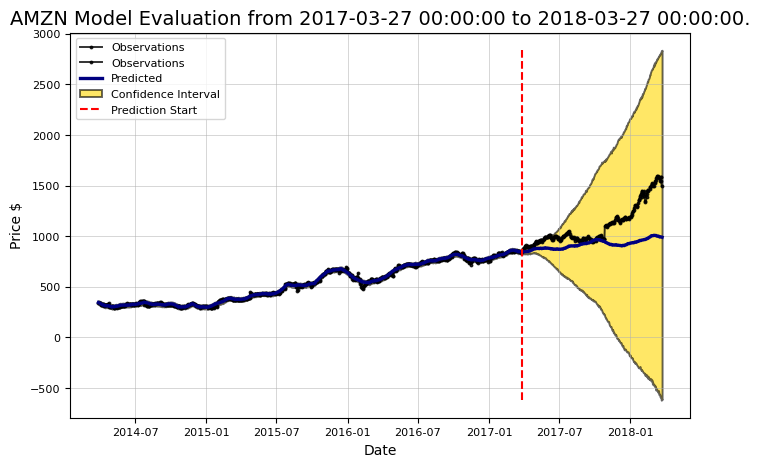

In [18]:
amazon.evaluate_prediction()

# 开始预测

e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


You played the stock market in AMZN from 2017-03-27 00:00:00 to 2018-03-27 00:00:00 with 1000 shares.

When the model predicted an increase, the price increased 59.46% of the time.
When the model predicted a  decrease, the price decreased  45.00% of the time.

The total profit using the Prophet model = $484970.00.
The Buy and Hold strategy profit =         $648740.00.

Thanks for playing the stock market!



e:\ProgramItem\TransferCode\stocker\stocker.py:779: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pred_increase["pred_profit"] = prediction_profit


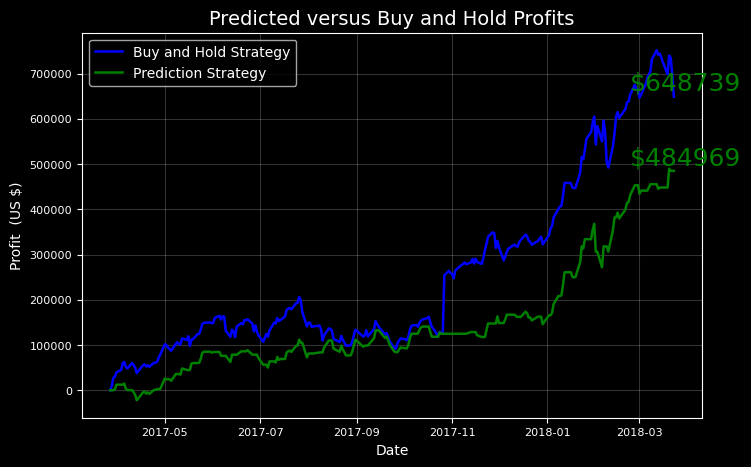

In [21]:
amazon.evaluate_prediction(nshares=1000)

未来10天价格

e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Predicted Increase: 

         Date     estimate     change        upper        lower
1  2018-03-28  1576.239671   2.196433  1597.823364  1554.753318
2  2018-03-29  1580.173732   3.934061  1600.474070  1559.396922
3  2018-03-30  1586.840276   6.666543  1609.851190  1565.196315
6  2018-04-02  1602.087900  15.247624  1623.583480  1581.774176
8  2018-04-04  1601.793345   0.349411  1623.241692  1581.284268
9  2018-04-05  1605.744483   3.951138  1628.696667  1582.688296
10 2018-04-06  1612.778102   7.033619  1635.784521  1591.364252

Predicted Decrease: 

        Date     estimate    change        upper       lower
7 2018-04-03  1601.443934 -0.643966  1622.122052  1579.93924


ValueError: rotation must be 'vertical', 'horizontal' or a number, not 45

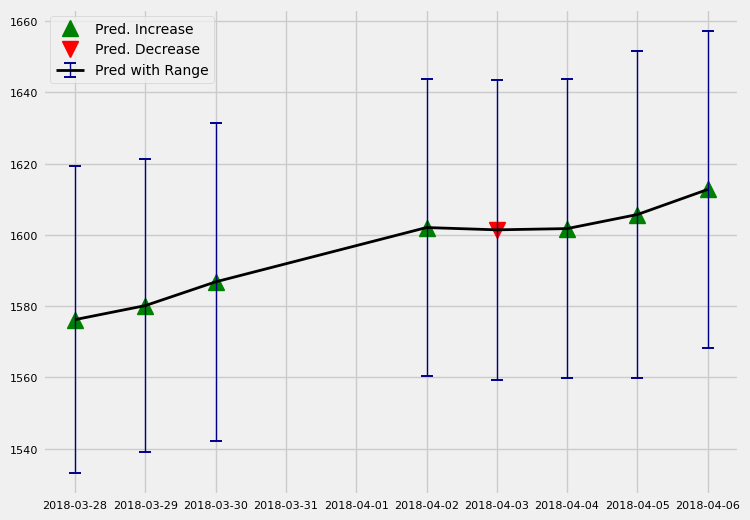

In [24]:
amazon.predict_future(days=10)

e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
e:\anaconda3\envs\dolphin\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Predicted Increase: 

         Date     estimate     change        upper        lower
1  2018-03-28  1576.239671   2.196433  1598.047494  1555.377708
2  2018-03-29  1580.173732   3.934061  1601.082997  1559.873896
3  2018-03-30  1586.840276   6.666543  1608.572537  1563.999139
6  2018-04-02  1602.087900  15.247624  1624.148876  1579.708210
8  2018-04-04  1601.793345   0.349411  1624.179055  1579.666091
9  2018-04-05  1605.744483   3.951138  1626.118553  1584.547508
10 2018-04-06  1612.778102   7.033619  1636.181991  1589.268850
13 2018-04-09  1625.340944  12.562842  1647.360490  1601.724342
14 2018-04-10  1626.460636   1.119692  1648.695666  1600.307525
15 2018-04-11  1630.080022   3.619386  1652.844620  1604.033729
16 2018-04-12  1636.454862   6.374840  1660.326781  1609.762212
17 2018-04-13  1643.199729   6.744867  1668.148671  1617.313791
20 2018-04-16  1649.353410   6.153682  1675.349854  1623.906423
21 2018-04-17  1651.214364   1.860954  1678.149491  1621.338857
22 2018-04-18  16

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 45

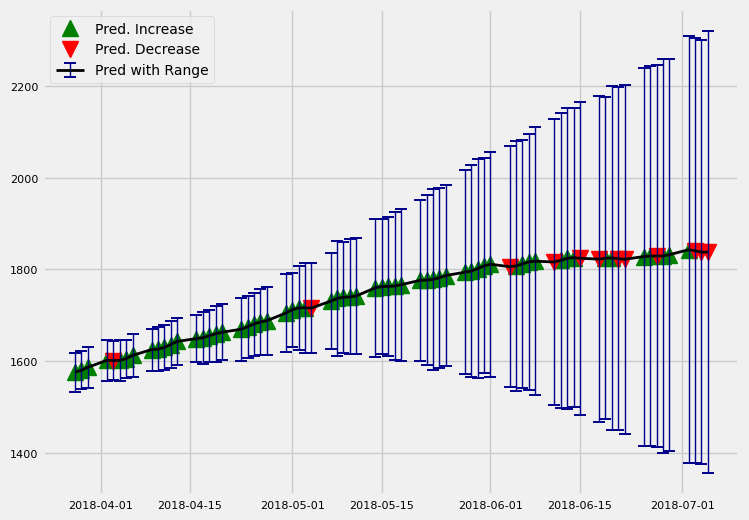

In [25]:
amazon.predict_future(days=100)